# Implementation of DeepBind neural network using EUGENe

**Authorship:**
Hayden Stites, Adam Klie, *08/12/2022*
***
**Description:**
Replicating experimental results from DeepBind and RNAcomplete (Ray, D., Kazan, H., Cook, K. et al.) using the eugene framework. 👍
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload 
%autoreload 2

import numpy as np
import pandas as pd
import eugene as eu

# Configure EUGENe 
print(eu.__version__)
eu.settings.dataset_dir = "./datasets/"
eu.settings.logging_dir = "./eugene_log/"
eu.settings.output_dir = "./eugene_output/"

# Test experimentally
eu.settings.dl_num_workers = 1
eu.settings.batch_size = 100

c:\Users\Lab\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Lab\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")
Global seed set to 13
c:\users\lab\documents\eugene\eugene\dataloading\dataloaders\_SeqData.py:11: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index


janggu does not work on this machine, are you using MacOS or Linux?
janggu does not work on this machine, are you using MacOS or Linux?
0.1.0


# Dataloading
The RNAcomplete dataset has its own helper function in the `datasets` module that returns a `SeqData` object from the dataset. The function will download and load the normalized RNAcomplete dataset from the hugheslab online repository, but the raw version can be specified. The directory that the dataset is downloaded into is specified by `eu.settings.dataset_dir`.

In [2]:
# Import the RNAcomplete dataset
from eugene.datasets import RNAcomplete
sdata = RNAcomplete()

Dataset RNAcomplete norm_data.txt.gz has already been dowloaded.


In [3]:
# This displays the probe intensities recorded in the dataset
sdata.seqs_annot

,RNCMPT00100,RNCMPT00101,RNCMPT00102,RNCMPT00103,RNCMPT00104,RNCMPT00105,RNCMPT00106,RNCMPT00107,RNCMPT00108,RNCMPT00109,...,RNCMPT00008,RNCMPT00090,RNCMPT00091,RNCMPT00093,RNCMPT00094,RNCMPT00095,RNCMPT00096,RNCMPT00097,RNCMPT00099,RNCMPT00009
seq000000,1.122218,1.272641,-1.089717,-0.067146,0.831671,-0.070631,2.779642,2.509418,1.811186,2.762714,...,5.734185,0.907487,1.282393,0.861743,-0.115417,0.126413,1.010198,-0.123415,-0.060651,-0.398931
seq000001,8.840295,-2.113002,2.397376,-1.809082,-0.963712,-0.202229,-0.121975,-0.038112,-0.636935,-1.100769,...,NaN,0.029810,0.986617,3.979510,-0.388808,-0.348266,0.216500,-1.098411,3.820988,NaN
seq000002,-0.353194,-0.183539,-0.467021,-1.865032,0.663077,0.626212,0.910989,1.431777,0.003613,-0.086335,...,0.198792,1.821554,1.289043,-1.282063,-0.640817,0.054688,-1.351889,0.470123,-0.057985,-1.057710
seq000003,1.386679,-0.236797,-0.031135,-0.997679,-0.079547,0.473447,6.296981,7.877085,13.880688,10.165925,...,NaN,1.121754,1.009484,0.450070,-1.106999,1.617407,0.272935,0.621780,0.643033,NaN
seq000004,-0.267395,1.387100,0.986554,-0.622790,-0.261790,-0.782576,-0.674672,-0.432181,0.007804,-0.629471,...,NaN,0.472460,0.476233,-0.150370,-0.545728,-0.398383,-0.677650,-0.122340,-0.891034,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq241352,1.674055,20.389858,0.770055,12.959504,11.324906,0.086366,7.169778,5.404982,1.465122,1.487886,...,0.687683,-1.841742,-0.141082,7.559083,0.501589,2.483238,-0.078747,1.047783,0.134119,1.433700
seq241353,-0.426269,-0.821294,0.591560,0.627169,0.459313,2.148826,-0.224518,-0.138735,-0.092908,-0.507217,...,NaN,1.903628,0.193573,0.087378,-0.699687,-2.233314,0.752704,-0.246153,-1.003296,NaN
seq241354,0.604869,-0.592981,-0.319087,-0.203019,0.625912,0.138792,0.195578,-0.531915,0.000103,0.128531,...,0.558631,-1.288070,0.400266,0.748016,0.156894,-0.426744,0.388496,0.169070,0.397499,NaN
seq241355,3.972188,1.513030,-1.339399,0.297040,-0.954315,1.459436,-0.456848,-0.532908,-1.082723,-0.884932,...,NaN,-0.019835,-1.293031,2.349549,2.965371,1.019436,-0.226711,18.726991,17.560194,NaN


# Data Visualization
In order to visualize the downloaded data, the `plotting` module can be used. This module has many functions that integrate `seaborn` functions with the `SeqData` object.

- The first plot depicts the frequency of a differing length of sequences appearing in the dataset.
- The second plot depicts the distribution of probe intensities in the `RNCMPT00100` column of the dataset. It can be noted that a few outliers are present in this graph, which would disrupt the machine learning process. This issue will be remedied with the `preprocessing` module.

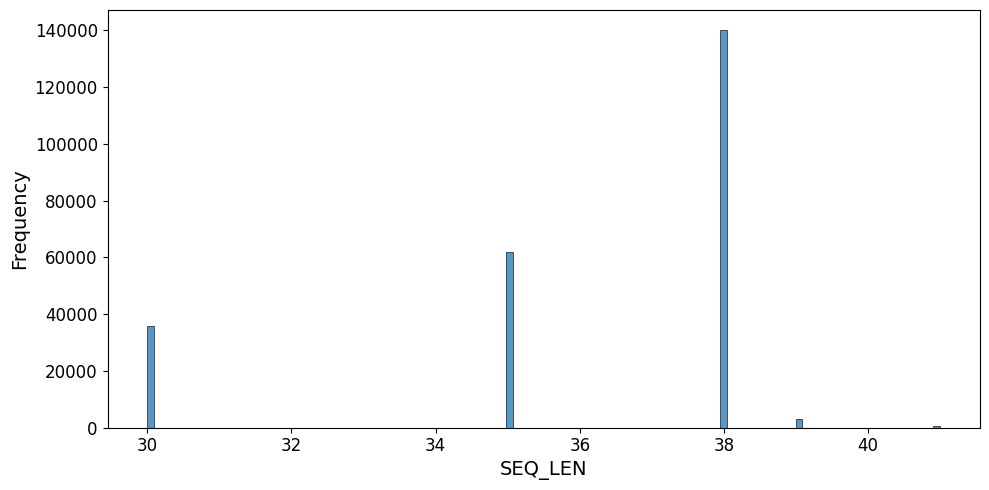

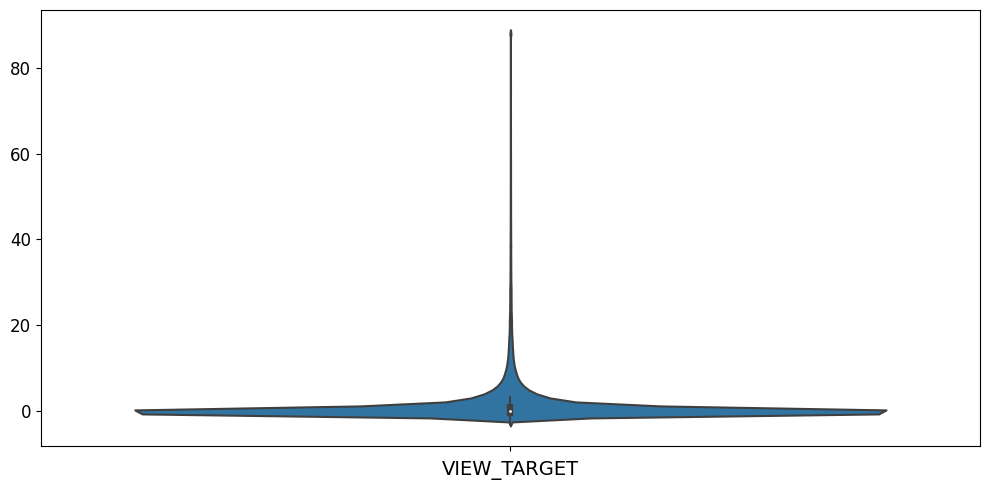

In [35]:
sdata["SEQ_LEN"] = [len(seq) for seq in sdata.seqs]
eu.pl.histplot(
    sdata, 
    keys="SEQ_LEN", 
    orient="h"
)

sdata["VIEW_TARGET"] = sdata["RNCMPT00100"].astype(float)
eu.pl.violinplot(
    sdata, 
    keys="VIEW_TARGET"
)

# Preprocessing
The `preprocessing` module contains a myriad of functions that help `SeqData` objects once they are filled with data. After generating the reverse compliments, one hot encoding, and splitting the data, two transforms are done to the data in order to increase its machine learning potential.

- The values of probe intensities are clamped at 99.95% percentile per binding protein to eliminate outliers and balance the data.
- Additionally, the probe intensities are normalized to a mean of 0 and a standard deviation of 1.

By `plotting` the distribution of probe intensities of the now preprocessed set of data, it can be seen how many of the outliers have been made less impactful on the set itself.

In [5]:
eu.pp.reverse_complement_data(sdata, RNA_bases=True)
eu.pp.one_hot_encode_data(sdata, RNA_bases=True)
eu.pp.train_test_split_data(sdata, split=0.8)

Reverse complementing sequences:   0%|          | 0/241357 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 241357 rev_seqs added


One-hot-encoding sequences:   0%|          | 0/241357 [00:00<?, ?it/s]

One-hot-encoding sequences:   0%|          | 0/241357 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 241357 ohe_seqs added
	ohe_rev_seqs: None -> 241357 ohe_rev_seqs added
SeqData object modified:
    seqs_annot:
        + train


In [6]:
# Only clamp and scale columns of usable data
drop_annots = ["SEQ_LEN", "VIEW_TARGET", "train"]
target_list = sdata.seqs_annot.columns.drop(drop_annots).tolist()

In [ ]:
eu.pp.clamp_percentiles(sdata, 0.9995, target_list)

In [ ]:
eu.pp.scale_targets(sdata, target_list, "train")

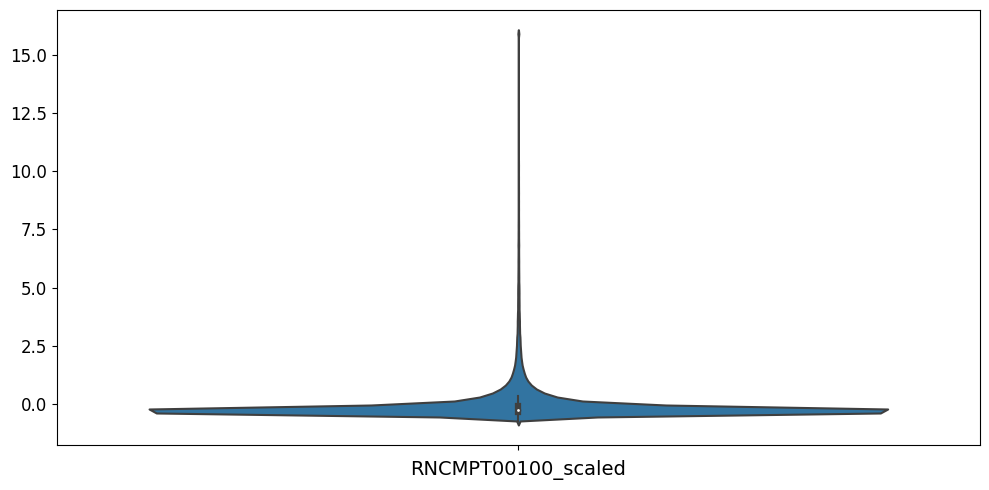

In [33]:
eu.pl.violinplot(
    sdata, 
    keys="RNCMPT00100_scaled"
)

# Training
Now that we have our data ready, it's time to train our model. This starts with instantiating and initializing our model. We can use the `models` module to do this:

```python
model = eu.models.DeepBind(
    input_len=100,
    output_dim=1,
    scheduler = "reduce_lr_on_plateau",
    scheduler_patience=2,
    lr=0.001
)
model.summary()
eu.models.init_weights(model)
```
We offer several options for instantiating a model architecture. Take a look at the API for more options and details.
- The `Base Model`s contain the 4 common base architectures: FCN, CNN, RNN and Hybrid. 
- The `SOTA Model`s contain 2 SOTA architectures: DeepBind and DeepSEA.
- The `Custom Models` are models that you can add to. We have  a single custom model currently implemented to serve as a template (`Jores21CNN`). Who knows? Maybe your custom model will become SOTA!

In [13]:
# TODO: Instantiate your model

With a model intantiated and initialized, we are set up to train our model. We can do this through the `train` module:

```python
eu.train.fit(
    model=model, 
    sdata=sdata, 
    gpus=1, 
    target="target",
    train_key="train",
    epochs=50,
    version=f"v1"
)
```

We can see how well our models trained by plotting a training summary:

```python
eu.train.pl_training_summary(model_leaf, version=f"v1")
```

In [14]:
# TODO: Initialize your models parameters

# Evaluation
After the model's been trained, we can evaluate our performance on our training data and our held-out test data. This is done through the `plotting` module.
It is often best to use the model that achieved the lowest loss on the validation data for evaluation. We can load this model in from the log directory:
```python
best_model = eu.models.DeepBind.load_from_checkpoint("...")
```
We can then use this model to make predictions on our training and validation data and to visualize the performance:
```python
eu.predict.train_val_predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    train_key="train",
    version=f"v1",
)
train_idx = np.where(sdata_leaf_train["train"] == True)[0]
eu.pl.performance_scatter(
    sdata, 
    seq_idx=train_idx, 
    target="target", 
    prediction="target_predictions",
    title="Training Set Performance",
    alpha=0.5,
)
```

In [15]:
# TODO: See how you performed and the training and validation sets

It is important to understand how the model is performing on a held-out (and ideally independent) test set. You should either load this separately above, here or have split your data up in preprocessing (see `jores21_analysis.ipynb` for an example).

```python
eu.predict.predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    version=f"v1",
    file_label="test"
)
eu.predict.predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    version=f"v1",
    file_label="test"
)

In [16]:
# TODO: If you have a test set, see how you did on that

# Interpretation
Potentially the most important step in the EUGENe workflow is the interpretation of the model's predictions. This is done through the `interpret` module. All the functions in this module act on either `SeqData` and Models or just Models. Results from these calls can be visualized using the `plotting` module.
---
There are many options for interpreting the model's predictions, and we will again point users to the API for all the options and their arguments. We list examples for a few common ones below.


```python
eu.interpret.generate_pfms(
    best_model_leaf, 
    sdata_leaf_test
)
```

## Feature attribution
We can calculate the contribution of each nucleotide to the model's predictions for a sequence by using the `interpret` module's `feature_attribution` function. We currently implement several different methods for this, includeing `DeepLift, ISM, InputXGradient and DeepSHAP`.
```python
eu.interpret.feature_attribution(
    best_model,
    sdata_test,
    saliency_method="DeepLift",
    device= "cuda" if eu.settings.gpus > 0 else "cpu"
)
```

In [17]:
# TODO: Run feature attribution on your model

## Filter Visualization 
We can get an idea for what each filter of first convoulional layer of the model is seeing by using the `interpret` module's `generate_pfms` function. This creates a position frequency matrix for each filter in the model using sequences that highly activate that filter (can be defined in multiple ways). We often times pass the the test sequences through the model, but you can theoretically pass any sequences you want.
```python
eu.interpret.generate_pfms(
    best_model, 
    sdata_test
)
```

In [18]:
# TODO: Run filter visualization on your model

## Other intepretation methods
We currently implement a few other methods for interpreting the model's predictions. These include:
- Dimensionality Reduction on your importance scores: e.g. `eu.interpret.pca`
- ...
We are looking to add more! If you are interested in contributing...

In [19]:
# TODO: Perform other intepretation methods on your trained model

# Wrapping up
EUGENe is very much meant to be a community project. It represents a collection of data, models, and techniques meant for analyzing sequence data with deep learning. We are looking for contributions in almost every aspect of EUGENe. We are particularly interested in:

- New model additions through the `models` module
- New dataset additions through the `datasets` module
- New preprocessing techniques through the `preprocessing` module
- New visualization techniques through the `plotting` module
- New interpretation techniques through the `interpret` module
- New methods for training models in the `train` module

Please do not hesitate to contact us if you have any questions or suggestions.

---